### Code Hist.

 - CODE  
    &ensp; : KIER Data_전처리 (결측 제거)  
  - DATE  
    &ensp; 2023-10-12 Created  
    &ensp; 2023-11-21 Code 최신화  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 1) 기존 모듈화된 함수 사용  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 2) 기존 KIER 변환 관련 코드를 모두 통합  
    &ensp; 2024-01-19 Code 개선  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 1) 공통코드 사용 경로 개선, Raw로 저장  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 2) HOT (온수 사용량) 전용 Code 작성  
    &ensp; 2024-01-30 Code 개선 후 백업  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 1) 순시사용량 보간 코드 작성 (미완)  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 2) 백업 후 코드 최적화    
    &ensp; 2024-02-05 Code 개선  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 1) 순시사용량 보간 코드 작성 (Method 02 1차 완성)  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ## A. 순시값을 보간하는 방법은 3가지로 제안 가능  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ##    a) 단순 Linear 보간 (앞뒤 평균치)  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ##       [Not Recommanded] 매우 긴 구간의 결측을 커버하기에 부적절  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ##                         (양 끝이 0인 경우, 해당 구간을 제대로 보간 불가)      
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ##    b) 직전 주 동일시간 사용량  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ##       나쁘지 않은 방법이지만, 직전 주의 데이터가 존재하지 않을 경우 보간 불가  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ##       (데이터 상 첫 주 케이스 등)  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ##    c-1) 해당 동일년도/동일월/동일요일/동일시간의 평균 사용량  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ##         나쁘지 않은 방법이지만, 과정이 조금 복잡해짐  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ##    c-2) 해당 동일 일시의 348 세대의 평균 사용량  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ##         c-1보다 기대되는 적용 데이터량이 많으며,   
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ##         한파/폭염/우천 등의 예외적인 주간의 사용량 변동을 피할 수 있어서 오차를 줄일 수 있다고 판단됨.

    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ## B. 순시값을 보간하기 전 단계  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ##    a) Resample시, 시간이 NaN인 구간은 그 간격에서 비어있는 행이다.  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ##       해당 행의 순시값을 NaN으로 처리   
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ##    b-1) 시점 n의 적산량이 0이고 시점 n + 1의 적산량이 정상 경우  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ##         해당 행의 순시값을 NaN으로 처리  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ##    b-2) 시점 n의 순시량이 음수인 경우  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ##         해당 행의 순시값을 NaN으로 처리  
    &ensp; 2024-02-07 Code 개선  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 1) 결측 처리 부분 정확도 개선  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 2) Raw Data 상 결측치가 15% 이상일 경우, 해당 데이터를 사용하지 않는 부분 추가  
    
 - DESC  
    &ensp; : int_Domain 코드의 변경에 따라,   
    &emsp; KIER 에너지 사용량 데이터를 동/층/세대별로 분리    

    &emsp; 또한, Raw Data과 세대별 데이터 추출 단계에서,  
    &emsp; 아래와 같은 작업 진행  

    &emsp; [수행 작업]  
    &emsp; 1) Date Column에 대한 유효성 검사 및 이상 Data에 대한 소거  
    &emsp; 1-1) Datetime 유효성 확인  
    &emsp; 1-2) Datetime 이상치 제거  
    &emsp; 2) HOUSE_ID_HO의 해시값을 int_house_num으로 변경 (용량 절감 목적)  
 - DATA  
    1) Period :   
    2) Interval :   
 - Link  
    &ensp; : 

## 01. Code

### 01-01. Init

#### 01-01-01. Init_Module Import

#### Module import

In [1]:
#region Basic_Import
## Basic
import os
os.path.dirname(os.path.abspath('__file__'))
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import math
import random

## Datetime
import time
import datetime as dt
from datetime import datetime, date, timedelta

import glob
from glob import glob
import requests
import json

## 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

from scipy import stats

## TSNE
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

## 정규화
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
## Modeling, Model Training
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
## Model 평가
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score   # model.score   

## Excel/CSV
import openpyxl, xlrd

import urllib
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

## Init.
pd.options.display.float_format = '{:.10f}'.format
#endregion Basic_Import

In [2]:
## Import_DL
str_tar = "tf"
## For Torch
if str_tar == "torch":
    import torch
    import torch.nn as nn
    from torch.nn.utils import weight_norm
    print("Torch Imported")
## For TF
elif str_tar == "tf":
    import tensorflow as tf
    import tensorflow_addons as tfa
    print("Tensorflow Imported")
else:
    print("Error : Cannot be used except for Keywords")
    print(" : torch / tf")

Tensorflow Imported


In [3]:
## Import_Local
from Src_Dev_Common import DEV_Common_Data_Datetime as com_date
from Src_Dev_Common import DEV_KASI_Holiday as com_Holi
from Src_Dev_Common import DEV_Common_Data_Analysis as com_Analysis
from Src_Dev_Common import DEV_Common_Data_Preprocessing as com_Prep
from Src_Dev_Common import DEV_Common_Data_Visualization as com_Visual
from Src_Dev_Common import DEV_KMA_Weather_ASOS as com_ASOS
from Src_Dev_Common import DEV_KDHC_Usage as com_KDHC
from Src_Dev_Common import DEV_KIER_Usage as com_KIER

### 01-01-02. Config (Directory, Params)

In [4]:
## Init_config
SEED = 42

np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = "1"
random.seed(SEED)

In [5]:
## Define Todate str
str_now_ymd = pd.datetime.now().date()
str_now_y = pd.datetime.now().year
str_now_m = pd.datetime.now().month
str_now_d = pd.datetime.now().day
str_now_hr = pd.datetime.now().hour
str_now_min = pd.datetime.now().minute

print(pd.datetime.now())
print(str(str_now_y) + " / " + str(str_now_m)  + " / " + str(str_now_d))
print(str(str_now_hr) + " : " + str(str_now_min))

2024-05-30 16:00:34.512270
2024 / 5 / 30
16 : 0


In [6]:
## Dict_Domain
dict_domain = {0:"ELEC", 1:"HEAT", 2:"WATER", 3:"HOT_HEAT", 4:"HOT_FLOW", 99:"GAS"} ## GAS는 사용하지 않음.
int_domain = 0
str_domain = str(dict_domain[int_domain])

dict_col_accu = {0 : "ACTUAL_ACCU_EFF" ## ELEC
                 , 1 : "ACCU_HEAT" ## HEAT
                 , 2 : "ACCU_FLOW" ## WATER
                 , 3 : "ACCU" ## HOT 열량
                 , 4 : "ACCU" ## HOT 유량
                 , 99 : "ACCU_FLOW" ## GAS
                 }
str_col_accu = str(str_domain + "_" + str(dict_col_accu[int_domain]))

dict_col_inst = {0 : "INST_EFF" ## ELEC_INST_EFF
                , 1 : "INST_HEAT" ## HEAT_INST_HEAT
                , 2 : "INST_FLOW" ## WATER_INST_FLOW
                , 3 : "INST" ## HOT_HEAT_INST
                , 4 : "INST" ## HOT_FLOW_INST
                , 99 : "INST_FLOW" ## GAS_INST_FLOW
                } 
str_col_inst = str(str_domain + "_" + str(dict_col_inst[int_domain]))

## Directory Root
str_dirData = "../data/data_Energy_KIER/"
str_dir_raw = '../data/data_Energy_KIER/KIER_0_Raw/'
str_dirName_bld = '../data/data_Energy_KIER/KIER_1_BLD/'
str_dirName_f = '../data/data_Energy_KIER/KIER_2_F_' + str_domain + '/'
str_dirName_h = '../data/data_Energy_KIER/KIER_3_H_' + str_domain + '/'

## File
str_fileRaw = str('KIER_RAW_' + str_domain + '_2023-11-12.csv')
str_fileRaw_hList = str('KIER_hList_' + str_domain + '.csv')

print(str(os.listdir(str_dirData)) + "\n")
print(os.listdir(str_dirName_h))

['.ipynb_checkpoints', 'BS_CONFIGURATION_202309251452.csv', 'Data_Population_SJ_2014_2018_1st_Interpolated.csv', 'Data_Population_SJ_2014_2018_D_1st_Interpolated.csv', 'Data_Population_SJ_2014_2018_H_1st_Interpolated.csv', 'DATE_1M_2023-10-20.csv', 'ENV_SENSOR_HST_202309251452.csv', 'F1_MAIN_POWER_HST_202309251503.csv', 'F1_SUB_POWER_HST_202309251510.csv', 'HEATPUMP_HST_202309251520.csv', 'KIER_0_Raw', 'KIER_1_BLD', 'KIER_2_F_ELEC', 'KIER_2_F_GAS', 'KIER_2_F_HEAT', 'KIER_2_F_HOT', 'KIER_2_F_WATER', 'KIER_3_H_ELEC', 'KIER_3_H_GAS', 'KIER_3_H_HEAT', 'KIER_3_H_HOT', 'KIER_3_H_HOT_FLOW', 'KIER_3_H_HOT_HEAT', 'KIER_3_H_WATER', 'KIER_ASOS_WEATHER_DAILY_202309251521.csv', 'KIER_ASOS_WEATHER_HOUR_202309251521.csv', 'KIER_DATA_OLD', 'KIER_List_Table_Column_2023-09-25.xlsx', 'KIER_Query_2023-09-25.txt', 'KMA_ASOS_119_2010_2023_1st_to CSV.csv', 'LIGHT_HST_202309251523.csv', 'MACHINE_ROOM_HEAT_HST_202309251534.csv', 'MACHINE_ROOM_POWER_APT_HST_20221205_202309251617.csv', 'MACHINE_ROOM_POWER_APT_HS

In [7]:
## "KIER_01-01_Data_hList.ipynb"로부터 만들어진 Bld/F/H List
df_kier_hList = pd.read_csv(str_dir_raw + str_fileRaw_hList
                            , index_col = 0)
print(df_kier_hList.columns)
df_kier_hList

Index(['HOUSE_ID_DONG', 'HOUSE_ID_HO_PRE', 'HOUSE_ID_HO_INT', 'HOUSE_ID_HO'], dtype='object')


,HOUSE_ID_DONG,HOUSE_ID_HO_PRE,HOUSE_ID_HO_INT,HOUSE_ID_HO
0,561,1,1,NkI4M0EzNDYxQTE1MDJERjM4NURERTcyRjdGQTJDMDU=
1,561,1,2,ODBEOTE0QzZCMjg5RUMzNTRBQjM1NjE0RDNBNDE0NzU=
2,561,1,3,QTUwRUJDQTlBMkZENUQyNjg0RDRGREVFMTNGNDI3NUY=
3,561,1,4,RkRCQzY4OTlCMTRDQjgzNUZBREE3Njc2MkM2MUM2QjI=
4,561,2,1,MTQxNkQ1RDAzOTE5NTM5RUM3MzlDQkY3RTI2NERCQTM=
...,...,...,...,...
343,563,23,2,QkJCQjQwOThFNjgwNjUwQzJGRUJFNDlCNTREOEUxNDU=
344,563,23,3,QUJENzFFMEFDRjM4MjY3NTRDQzJCRjdDNUQ3ODA0N0Y=
345,563,23,4,RUVENzZDNTc4MUY4NDg5MUREQjZEOUM1M0Q2RjYzMDE=
346,563,24,1,NEVENDc1OTFFNDBBRjBDQzkzMTlEMDgzMkMzMkZFQTg=


## 01-02. Data Load (df_raw)

### 01-02-01. KIER (Energy Usage)

### KIER 사용량 데이터 Load

In [8]:
df_h = pd.DataFrame()
df_h['HOUSE_LIST'] = df_kier_hList['HOUSE_ID_DONG'].astype('string') + '-' + df_kier_hList['HOUSE_ID_HO_PRE'].astype('string') + '-' + df_kier_hList['HOUSE_ID_HO_INT'].astype('string')
df_h = df_h.drop_duplicates().reset_index()[['HOUSE_LIST']]
df_h

,HOUSE_LIST
0,561-1-1
1,561-1-2
2,561-1-3
3,561-1-4
4,561-2-1
...,...
343,563-23-2
344,563-23-3
345,563-23-4
346,563-24-1


In [9]:
## 순시사용량
str_file = 'KIER_' + str_domain + '_INST_03_IQR.csv'
df_inst_tmp = pd.read_csv(str_dirName_h + str_file
                        , index_col = 0).reset_index()
df_inst_tmp['METER_DATE'] = pd.to_datetime(df_inst_tmp['METER_DATE'])
print(df_inst_tmp.isna().sum())
df_inst_tmp

index                     0
METER_DATE                0
ELEC_INST_EFF_561-1-1     0
ELEC_INST_EFF_561-1-2     0
ELEC_INST_EFF_561-1-3     0
                         ..
ELEC_INST_EFF_563-23-4    0
ELEC_INST_EFF_563-24-1    0
ELEC_INST_EFF_563-24-2    0
MEAN_OF_INST              0
SUM_OF_INST               0
Length: 352, dtype: int64


,index,METER_DATE,ELEC_INST_EFF_561-1-1,ELEC_INST_EFF_561-1-2,ELEC_INST_EFF_561-1-3,ELEC_INST_EFF_561-1-4,ELEC_INST_EFF_561-2-1,ELEC_INST_EFF_561-2-2,ELEC_INST_EFF_561-2-3,ELEC_INST_EFF_561-2-4,...,ELEC_INST_EFF_563-22-5,ELEC_INST_EFF_563-22-6,ELEC_INST_EFF_563-23-1,ELEC_INST_EFF_563-23-2,ELEC_INST_EFF_563-23-3,ELEC_INST_EFF_563-23-4,ELEC_INST_EFF_563-24-1,ELEC_INST_EFF_563-24-2,MEAN_OF_INST,SUM_OF_INST
0,0,2022-07-17 23:20:00,0.1700000000,0.1700000000,0.0400000000,0.2900000000,0.1800000000,0.0500000000,0.0750000000,0.0800000000,...,0.0300000000,0.0400000000,0.0500000000,0.0800000000,0.0600000000,0.0600000000,0.0300000000,0.1000000000,0.0839589443,28.6300000000
1,1,2022-07-17 23:30:00,0.1600000000,0.1800000000,0.0300000000,0.2100000000,0.1300000000,0.0400000000,0.1300000000,0.0700000000,...,0.0200000000,0.0400000000,0.0600000000,0.0600000000,0.0500000000,0.0784866469,0.0200000000,0.0900000000,0.0784866469,26.4500000000
2,2,2022-07-17 23:40:00,0.1400000000,0.2300000000,0.0300000000,0.2400000000,0.1400000000,0.0400000000,0.0900000000,0.0700000000,...,0.0400000000,0.0300000000,0.0500000000,0.0600000000,0.0500000000,0.0764809384,0.0300000000,0.0900000000,0.0764809384,26.0800000000
3,3,2022-07-17 23:50:00,0.1400000000,0.2100000000,0.0200000000,0.2700000000,0.1500000000,0.0400000000,0.1100000000,0.0800000000,...,0.0400000000,0.0400000000,0.0400000000,0.0600000000,0.0400000000,0.0500000000,0.0300000000,0.0800000000,0.0744970414,25.1800000000
4,4,2022-07-18 00:00:00,0.1500000000,0.2100000000,0.0300000000,0.2200000000,0.1400000000,0.0500000000,0.0900000000,0.0800000000,...,0.0400000000,0.0400000000,0.0300000000,0.0600000000,0.0600000000,0.0300000000,0.0200000000,0.0600000000,0.0718100890,24.2000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84977,84977,2024-02-28 02:10:00,0.1000000000,0.0300000000,0.0300000000,0.0400000000,0.0400000000,0.0200000000,0.0200000000,0.0300000000,...,0.0200000000,0.0300000000,0.0300000000,0.1000000000,0.0400000000,0.0300000000,0.0200000000,0.0300000000,0.0422988506,14.7200000000
84978,84978,2024-02-28 02:20:00,0.1000000000,0.0300000000,0.0400000000,0.0400000000,0.0700000000,0.0300000000,0.0100000000,0.0300000000,...,0.0200000000,0.0200000000,0.0200000000,0.1000000000,0.0400000000,0.0300000000,0.0300000000,0.0400000000,0.0416091954,14.4800000000
84979,84979,2024-02-28 02:30:00,0.0700000000,0.0400000000,0.0300000000,0.0400000000,0.0700000000,0.0200000000,0.0200000000,0.0300000000,...,0.0400000000,0.0300000000,0.0300000000,0.1200000000,0.0300000000,0.0300000000,0.0300000000,0.0400000000,0.0405747126,14.1200000000
84980,84980,2024-02-28 02:40:00,0.0800000000,0.0400000000,0.0300000000,0.0400000000,0.0700000000,0.0300000000,0.0100000000,0.0200000000,...,0.0300000000,0.0300000000,0.0200000000,0.1100000000,0.0400000000,0.0400000000,0.0200000000,0.0300000000,0.0402011494,13.9900000000


In [10]:
## 적산사용량
str_file = 'KIER_' + str_domain + '_ACCU_01_RAW_10min.csv'
df_accu_tmp = pd.read_csv(str_dirName_h + str_file
                        , index_col = 0).reset_index()
df_accu_tmp['METER_DATE'] = pd.to_datetime(df_accu_tmp['METER_DATE'])
df_accu_tmp

,index,METER_DATE,ELEC_ACTUAL_ACCU_EFF_561-1-1,ELEC_ACTUAL_ACCU_EFF_561-1-2,ELEC_ACTUAL_ACCU_EFF_561-1-3,ELEC_ACTUAL_ACCU_EFF_561-1-4,ELEC_ACTUAL_ACCU_EFF_561-2-1,ELEC_ACTUAL_ACCU_EFF_561-2-2,ELEC_ACTUAL_ACCU_EFF_561-2-3,ELEC_ACTUAL_ACCU_EFF_561-2-4,...,ELEC_ACTUAL_ACCU_EFF_563-22-3,ELEC_ACTUAL_ACCU_EFF_563-22-4,ELEC_ACTUAL_ACCU_EFF_563-22-5,ELEC_ACTUAL_ACCU_EFF_563-22-6,ELEC_ACTUAL_ACCU_EFF_563-23-1,ELEC_ACTUAL_ACCU_EFF_563-23-2,ELEC_ACTUAL_ACCU_EFF_563-23-3,ELEC_ACTUAL_ACCU_EFF_563-23-4,ELEC_ACTUAL_ACCU_EFF_563-24-1,ELEC_ACTUAL_ACCU_EFF_563-24-2
0,0,2022-07-17 23:20:00,798.6900000000,650.6700000000,452.0000000000,812.2400000000,664.2700000000,288.9400000000,456.5100000000,470.1200000000,...,524.5100000000,462.4000000000,489.8000000000,470.6400000000,358.2800000000,523.9700000000,441.8800000000,380.0800000000,393.9300000000,511.9200000000
1,1,2022-07-17 23:30:00,798.8600000000,650.8400000000,452.0400000000,812.5300000000,664.4500000000,288.9900000000,456.9200000000,470.2000000000,...,524.6600000000,462.5100000000,489.8300000000,470.6800000000,358.3300000000,524.0500000000,441.9400000000,380.1400000000,393.9600000000,512.0200000000
2,2,2022-07-17 23:40:00,799.0200000000,651.0200000000,452.0700000000,812.7400000000,664.5800000000,289.0300000000,457.0500000000,470.2700000000,...,524.7800000000,462.6100000000,489.8500000000,470.7200000000,358.3900000000,524.1100000000,441.9900000000,NaN,393.9800000000,512.1100000000
3,3,2022-07-17 23:50:00,799.1600000000,651.2500000000,452.1000000000,812.9800000000,664.7200000000,289.0700000000,457.1400000000,470.3400000000,...,524.8800000000,462.7100000000,489.8900000000,470.7500000000,358.4400000000,524.1700000000,442.0400000000,380.2400000000,394.0100000000,512.2000000000
4,4,2022-07-18 00:00:00,799.3000000000,651.4600000000,452.1200000000,813.2500000000,664.8700000000,289.1100000000,457.2500000000,470.4200000000,...,525.0000000000,462.8100000000,489.9300000000,470.7900000000,358.4800000000,524.2300000000,442.0800000000,380.2900000000,394.0400000000,512.2800000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84978,84978,2024-02-28 02:20:00,9549.8500000000,8228.4500000000,6679.0300000000,9710.7200000000,10085.5400000000,4430.0700000000,6101.8900000000,5927.4100000000,...,5986.0100000000,5770.9300000000,6646.4300000000,5520.3300000000,5755.0200000000,8376.2000000000,6040.0100000000,4571.2000000000,5354.7700000000,6791.8200000000
84979,84979,2024-02-28 02:30:00,9549.9500000000,8228.4800000000,6679.0700000000,9710.7600000000,10085.6100000000,4430.1000000000,6101.9000000000,5927.4400000000,...,5986.0300000000,5770.9700000000,6646.4500000000,5520.3500000000,5755.0400000000,8376.3000000000,6040.0500000000,4571.2300000000,5354.8000000000,6791.8600000000
84980,84980,2024-02-28 02:40:00,9550.0200000000,8228.5200000000,6679.1000000000,9710.8000000000,10085.6800000000,4430.1200000000,6101.9200000000,5927.4700000000,...,5986.0400000000,5771.0400000000,6646.4900000000,5520.3800000000,5755.0700000000,8376.4200000000,6040.0800000000,4571.2600000000,5354.8300000000,6791.9000000000
84981,84981,2024-02-28 02:50:00,9550.1000000000,8228.5600000000,6679.1300000000,9710.8400000000,10085.7500000000,4430.1500000000,6101.9300000000,5927.4900000000,...,5986.0400000000,5771.0800000000,6646.5200000000,5520.4100000000,5755.0900000000,8376.5300000000,6040.1200000000,4571.3000000000,5354.8500000000,6791.9300000000


In [11]:
## 적산값 데이터의 첫 값이 NaN인 경우, 향후 연산에서 전체 데이터에 대한 NaN값으로 연산 우려
## 해당 값을 해당 호실 적산 사용량의 최소치로 치환
list_col = df_accu_tmp.columns[1:]
for str_col in list_col:
    if pd.isna(df_accu_tmp[str_col].iloc[0]):
        print(str_col)
        # print(df_accu_tmp[str_col].isna().sum())
        # print(df_accu_tmp[str_col].min())
        df_accu_tmp[str_col].iloc[0] = df_accu_tmp[str_col].min()

## 최종 보간 및 연산된 적산 데이터
df_accu = df_accu_tmp
df_accu

ELEC_ACTUAL_ACCU_EFF_562-1-5
ELEC_ACTUAL_ACCU_EFF_562-2-5


,index,METER_DATE,ELEC_ACTUAL_ACCU_EFF_561-1-1,ELEC_ACTUAL_ACCU_EFF_561-1-2,ELEC_ACTUAL_ACCU_EFF_561-1-3,ELEC_ACTUAL_ACCU_EFF_561-1-4,ELEC_ACTUAL_ACCU_EFF_561-2-1,ELEC_ACTUAL_ACCU_EFF_561-2-2,ELEC_ACTUAL_ACCU_EFF_561-2-3,ELEC_ACTUAL_ACCU_EFF_561-2-4,...,ELEC_ACTUAL_ACCU_EFF_563-22-3,ELEC_ACTUAL_ACCU_EFF_563-22-4,ELEC_ACTUAL_ACCU_EFF_563-22-5,ELEC_ACTUAL_ACCU_EFF_563-22-6,ELEC_ACTUAL_ACCU_EFF_563-23-1,ELEC_ACTUAL_ACCU_EFF_563-23-2,ELEC_ACTUAL_ACCU_EFF_563-23-3,ELEC_ACTUAL_ACCU_EFF_563-23-4,ELEC_ACTUAL_ACCU_EFF_563-24-1,ELEC_ACTUAL_ACCU_EFF_563-24-2
0,0,2022-07-17 23:20:00,798.6900000000,650.6700000000,452.0000000000,812.2400000000,664.2700000000,288.9400000000,456.5100000000,470.1200000000,...,524.5100000000,462.4000000000,489.8000000000,470.6400000000,358.2800000000,523.9700000000,441.8800000000,380.0800000000,393.9300000000,511.9200000000
1,1,2022-07-17 23:30:00,798.8600000000,650.8400000000,452.0400000000,812.5300000000,664.4500000000,288.9900000000,456.9200000000,470.2000000000,...,524.6600000000,462.5100000000,489.8300000000,470.6800000000,358.3300000000,524.0500000000,441.9400000000,380.1400000000,393.9600000000,512.0200000000
2,2,2022-07-17 23:40:00,799.0200000000,651.0200000000,452.0700000000,812.7400000000,664.5800000000,289.0300000000,457.0500000000,470.2700000000,...,524.7800000000,462.6100000000,489.8500000000,470.7200000000,358.3900000000,524.1100000000,441.9900000000,NaN,393.9800000000,512.1100000000
3,3,2022-07-17 23:50:00,799.1600000000,651.2500000000,452.1000000000,812.9800000000,664.7200000000,289.0700000000,457.1400000000,470.3400000000,...,524.8800000000,462.7100000000,489.8900000000,470.7500000000,358.4400000000,524.1700000000,442.0400000000,380.2400000000,394.0100000000,512.2000000000
4,4,2022-07-18 00:00:00,799.3000000000,651.4600000000,452.1200000000,813.2500000000,664.8700000000,289.1100000000,457.2500000000,470.4200000000,...,525.0000000000,462.8100000000,489.9300000000,470.7900000000,358.4800000000,524.2300000000,442.0800000000,380.2900000000,394.0400000000,512.2800000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84978,84978,2024-02-28 02:20:00,9549.8500000000,8228.4500000000,6679.0300000000,9710.7200000000,10085.5400000000,4430.0700000000,6101.8900000000,5927.4100000000,...,5986.0100000000,5770.9300000000,6646.4300000000,5520.3300000000,5755.0200000000,8376.2000000000,6040.0100000000,4571.2000000000,5354.7700000000,6791.8200000000
84979,84979,2024-02-28 02:30:00,9549.9500000000,8228.4800000000,6679.0700000000,9710.7600000000,10085.6100000000,4430.1000000000,6101.9000000000,5927.4400000000,...,5986.0300000000,5770.9700000000,6646.4500000000,5520.3500000000,5755.0400000000,8376.3000000000,6040.0500000000,4571.2300000000,5354.8000000000,6791.8600000000
84980,84980,2024-02-28 02:40:00,9550.0200000000,8228.5200000000,6679.1000000000,9710.8000000000,10085.6800000000,4430.1200000000,6101.9200000000,5927.4700000000,...,5986.0400000000,5771.0400000000,6646.4900000000,5520.3800000000,5755.0700000000,8376.4200000000,6040.0800000000,4571.2600000000,5354.8300000000,6791.9000000000
84981,84981,2024-02-28 02:50:00,9550.1000000000,8228.5600000000,6679.1300000000,9710.8400000000,10085.7500000000,4430.1500000000,6101.9300000000,5927.4900000000,...,5986.0400000000,5771.0800000000,6646.5200000000,5520.4100000000,5755.0900000000,8376.5300000000,6040.1200000000,4571.3000000000,5354.8500000000,6791.9300000000


#### 완전히 보간된 순시 사용량을 통해 적산 사용량을 복원

In [12]:
for str_h in df_h['HOUSE_LIST']:
    for i in range(0, len(df_accu) - 1):
        df_accu[str_col_accu + '_' + str_h].loc[i + 1] = df_accu_tmp[str_col_accu + '_' + str_h].loc[i] + df_inst_tmp[str_col_inst + '_' + str_h].loc[i]
df_accu

,index,METER_DATE,ELEC_ACTUAL_ACCU_EFF_561-1-1,ELEC_ACTUAL_ACCU_EFF_561-1-2,ELEC_ACTUAL_ACCU_EFF_561-1-3,ELEC_ACTUAL_ACCU_EFF_561-1-4,ELEC_ACTUAL_ACCU_EFF_561-2-1,ELEC_ACTUAL_ACCU_EFF_561-2-2,ELEC_ACTUAL_ACCU_EFF_561-2-3,ELEC_ACTUAL_ACCU_EFF_561-2-4,...,ELEC_ACTUAL_ACCU_EFF_563-22-3,ELEC_ACTUAL_ACCU_EFF_563-22-4,ELEC_ACTUAL_ACCU_EFF_563-22-5,ELEC_ACTUAL_ACCU_EFF_563-22-6,ELEC_ACTUAL_ACCU_EFF_563-23-1,ELEC_ACTUAL_ACCU_EFF_563-23-2,ELEC_ACTUAL_ACCU_EFF_563-23-3,ELEC_ACTUAL_ACCU_EFF_563-23-4,ELEC_ACTUAL_ACCU_EFF_563-24-1,ELEC_ACTUAL_ACCU_EFF_563-24-2
0,0,2022-07-17 23:20:00,798.6900000000,650.6700000000,452.0000000000,812.2400000000,664.2700000000,288.9400000000,456.5100000000,470.1200000000,...,524.5100000000,462.4000000000,489.8000000000,470.6400000000,358.2800000000,523.9700000000,441.8800000000,380.0800000000,393.9300000000,511.9200000000
1,1,2022-07-17 23:30:00,798.8600000000,650.8400000000,452.0400000000,812.5300000000,664.4500000000,288.9900000000,456.5850000000,470.2000000000,...,524.6600000000,462.5100000000,489.8300000000,470.6800000000,358.3300000000,524.0500000000,441.9400000000,380.1400000000,393.9600000000,512.0200000000
2,2,2022-07-17 23:40:00,799.0200000000,651.0200000000,452.0700000000,812.7400000000,664.5800000000,289.0300000000,456.7150000000,470.2700000000,...,524.7800000000,462.6100000000,489.8500000000,470.7200000000,358.3900000000,524.1100000000,441.9900000000,380.2184866469,393.9800000000,512.1100000000
3,3,2022-07-17 23:50:00,799.1600000000,651.2500000000,452.1000000000,812.9800000000,664.7200000000,289.0700000000,456.8050000000,470.3400000000,...,524.8800000000,462.7100000000,489.8900000000,470.7500000000,358.4400000000,524.1700000000,442.0400000000,380.2949675853,394.0100000000,512.2000000000
4,4,2022-07-18 00:00:00,799.3000000000,651.4600000000,452.1200000000,813.2500000000,664.8700000000,289.1100000000,456.9150000000,470.4200000000,...,525.0000000000,462.8100000000,489.9300000000,470.7900000000,358.4800000000,524.2300000000,442.0800000000,380.3449675853,394.0400000000,512.2800000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84978,84978,2024-02-28 02:20:00,9307.9052033583,8016.2061601580,6416.8981611768,9562.8797878018,9919.1429769242,4326.6591748331,5793.3210746192,5880.7847876088,...,5805.2803549409,5643.5565309476,6549.6892122654,5447.5046849750,5554.8468334014,8101.6554973584,5866.6585362870,4476.2129624692,5338.4554763053,6578.1170930119
84979,84979,2024-02-28 02:30:00,9308.0052033583,8016.2361601580,6416.9381611768,9562.9197878018,9919.2129769242,4326.6891748331,5793.3310746192,5880.8147876088,...,5805.3003549409,5643.5965309476,6549.7092122654,5447.5246849750,5554.8668334014,8101.7554973584,5866.6985362870,4476.2429624692,5338.4854763053,6578.1570930119
84980,84980,2024-02-28 02:40:00,9308.0752033583,8016.2761601580,6416.9681611768,9562.9597878018,9919.2829769242,4326.7091748331,5793.3510746192,5880.8447876088,...,5805.3103549409,5643.6665309476,6549.7492122654,5447.5546849750,5554.8968334014,8101.8754973584,5866.7285362870,4476.2729624692,5338.5154763053,6578.1970930119
84981,84981,2024-02-28 02:50:00,9308.1552033583,8016.3161601580,6416.9981611768,9562.9997878018,9919.3529769242,4326.7391748331,5793.3610746192,5880.8647876088,...,5805.3103549409,5643.7065309476,6549.7792122654,5447.5846849750,5554.9168334014,8101.9854973584,5866.7685362870,4476.3129624692,5338.5354763053,6578.2270930119


In [13]:
list_col = df_accu.columns[1:]

print(df_accu.shape)
for str_col in list_col:
    if df_accu[str_col].isnull().sum() > 0:
        print(str_col, '/', df_accu[str_col].isnull().sum(), '/', len(df_accu))
        # df_accu = df_accu.drop(columns = [str_col])
print(df_accu.shape)

(84983, 350)
(84983, 350)


In [14]:
str_file = 'KIER_' + str_domain + '_ACCU_02_InstBaseUpdated.csv' 
df_accu.to_csv(str_dirName_h + str_file)

In [15]:
list_col = df_accu.columns[1:]
df_kier_Calc = df_accu[list_col]
df_kier_extract = df_accu

df_kier_extract['MEAN_OF_ACCU'] = df_kier_Calc.mean(axis = 1)
df_kier_extract['SUM_OF_ACCU'] = df_kier_Calc.sum(axis = 1)
df_kier_extract

,index,METER_DATE,ELEC_ACTUAL_ACCU_EFF_561-1-1,ELEC_ACTUAL_ACCU_EFF_561-1-2,ELEC_ACTUAL_ACCU_EFF_561-1-3,ELEC_ACTUAL_ACCU_EFF_561-1-4,ELEC_ACTUAL_ACCU_EFF_561-2-1,ELEC_ACTUAL_ACCU_EFF_561-2-2,ELEC_ACTUAL_ACCU_EFF_561-2-3,ELEC_ACTUAL_ACCU_EFF_561-2-4,...,ELEC_ACTUAL_ACCU_EFF_563-22-5,ELEC_ACTUAL_ACCU_EFF_563-22-6,ELEC_ACTUAL_ACCU_EFF_563-23-1,ELEC_ACTUAL_ACCU_EFF_563-23-2,ELEC_ACTUAL_ACCU_EFF_563-23-3,ELEC_ACTUAL_ACCU_EFF_563-23-4,ELEC_ACTUAL_ACCU_EFF_563-24-1,ELEC_ACTUAL_ACCU_EFF_563-24-2,MEAN_OF_ACCU,SUM_OF_ACCU
0,0,2022-07-17 23:20:00,798.6900000000,650.6700000000,452.0000000000,812.2400000000,664.2700000000,288.9400000000,456.5100000000,470.1200000000,...,489.8000000000,470.6400000000,358.2800000000,523.9700000000,441.8800000000,380.0800000000,393.9300000000,511.9200000000,418.9518390805,145795.2400000000
1,1,2022-07-17 23:30:00,798.8600000000,650.8400000000,452.0400000000,812.5300000000,664.4500000000,288.9900000000,456.5850000000,470.2000000000,...,489.8300000000,470.6800000000,358.3300000000,524.0500000000,441.9400000000,380.1400000000,393.9600000000,512.0200000000,419.0320785564,145823.1633376098
2,2,2022-07-17 23:40:00,799.0200000000,651.0200000000,452.0700000000,812.7400000000,664.5800000000,289.0300000000,456.7150000000,470.2700000000,...,489.8500000000,470.7200000000,358.3900000000,524.1100000000,441.9900000000,380.2184866469,393.9800000000,512.1100000000,419.1101054331,145850.3166907257
3,3,2022-07-17 23:50:00,799.1600000000,651.2500000000,452.1000000000,812.9800000000,664.7200000000,289.0700000000,456.8050000000,470.3400000000,...,489.8900000000,470.7500000000,358.4400000000,524.1700000000,442.0400000000,380.2949675853,394.0100000000,512.2000000000,419.1859402201,145876.7071965907
4,4,2022-07-18 00:00:00,799.3000000000,651.4600000000,452.1200000000,813.2500000000,664.8700000000,289.1100000000,456.9150000000,470.4200000000,...,489.9300000000,470.7900000000,358.4800000000,524.2300000000,442.0800000000,380.3449675853,394.0400000000,512.2800000000,419.2602612369,145902.5709104327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84978,84978,2024-02-28 02:20:00,9307.9052033583,8016.2061601580,6416.8981611768,9562.8797878018,9919.1429769242,4326.6591748331,5793.3210746192,5880.7847876088,...,6549.6892122654,5447.5046849750,5554.8468334014,8101.6554973584,5866.6585362870,4476.2129624692,5338.4554763053,6578.1170930119,5768.7554067410,2007526.8815458752
84979,84979,2024-02-28 02:30:00,9308.0052033583,8016.2361601580,6416.9381611768,9562.9197878018,9919.2129769242,4326.6891748331,5793.3310746192,5880.8147876088,...,6549.7092122654,5447.5246849750,5554.8668334014,8101.7554973584,5866.6985362870,4476.2429624692,5338.4854763053,6578.1570930119,5768.7970159364,2007541.3615458738
84980,84980,2024-02-28 02:40:00,9308.0752033583,8016.2761601580,6416.9681611768,9562.9597878018,9919.2829769242,4326.7091748331,5793.3510746192,5880.8447876088,...,6549.7492122654,5447.5546849750,5554.8968334014,8101.8754973584,5866.7285362870,4476.2729624692,5338.5154763053,6578.1970930119,5768.8373320284,2007555.3915458717
84981,84981,2024-02-28 02:50:00,9308.1552033583,8016.3161601580,6416.9981611768,9562.9997878018,9919.3529769242,4326.7391748331,5793.3610746192,5880.8647876088,...,6549.7792122654,5447.5846849750,5554.9168334014,8101.9854973584,5866.7685362870,4476.3129624692,5338.5354763053,6578.2270930119,5768.8775619134,2007569.3915458734


Text(0.5, 1.0, 'Accumulated Electric Usage of Total')

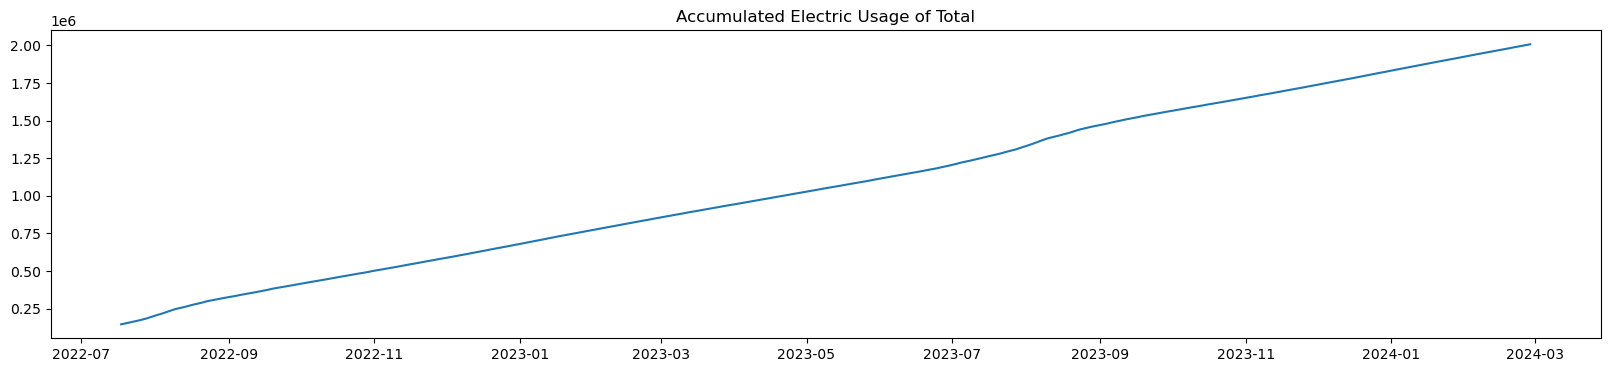

In [17]:
plt.figure(figsize=(20,4))
plt.plot(df_kier_extract['METER_DATE'], df_kier_extract['SUM_OF_ACCU'])
plt.title('Accumulated Electric Usage of Total')

#### 각 시간단위 데이터 추출
10분단위 적산치 데이터를 통해  
1) 1시간 단위  
2-1) 1일 단위  
2-2) 평일/주말단위  
3) 1개월 단위  
4) 적분값 (적산 총량)  
값을 각각 산출  

In [9]:
str_file = 'KIER_' + str_domain + '_ACCU_02_InstBaseUpdated.csv' 
df_accu = pd.read_csv(str_dirName_h + str_file
                      , index_col = 0)
str_file = 'KIER_' + str_domain + '_ACCU_02-01_10min.csv'
df_accu.to_csv(str_dirName_h + str_file)

In [12]:
## 10분별 순시
df_inst_resampled_10MIN = pd.DataFrame()
df_inst_resampled_10MIN['METER_DATE'] = df_accu['METER_DATE']

for str_h in df_h['HOUSE_LIST']:
    df_inst_resampled_10MIN[str_col_inst + '_' + str_h] = 0
    for i in range(0, len(df_accu) - 1):
        df_inst_resampled_10MIN[str_col_inst + '_' + str_h].loc[i] = df_accu[str_col_accu + '_' + str_h].loc[i + 1] - df_accu[str_col_accu + '_' + str_h].loc[i]
str_file = 'KIER_' + str_domain + '_INST_03-01_10min.csv' 
df_inst_resampled_10MIN.to_csv(str_dirName_h + str_file)
df_inst_resampled_10MIN

,METER_DATE,ELEC_INST_EFF_561-1-1,ELEC_INST_EFF_561-1-2,ELEC_INST_EFF_561-1-3,ELEC_INST_EFF_561-1-4,ELEC_INST_EFF_561-2-1,ELEC_INST_EFF_561-2-2,ELEC_INST_EFF_561-2-3,ELEC_INST_EFF_561-2-4,ELEC_INST_EFF_561-3-1,...,ELEC_INST_EFF_563-22-3,ELEC_INST_EFF_563-22-4,ELEC_INST_EFF_563-22-5,ELEC_INST_EFF_563-22-6,ELEC_INST_EFF_563-23-1,ELEC_INST_EFF_563-23-2,ELEC_INST_EFF_563-23-3,ELEC_INST_EFF_563-23-4,ELEC_INST_EFF_563-24-1,ELEC_INST_EFF_563-24-2
0,2022-07-17 23:20:00,0.1700000000,0.1700000000,0.0400000000,0.2900000000,0.1800000000,0.0500000000,0.0750000000,0.0800000000,0.1200000000,...,0.1500000000,0.1100000000,0.0300000000,0.0400000000,0.0500000000,0.0800000000,0.0600000000,0.0600000000,0.0300000000,0.1000000000
1,2022-07-17 23:30:00,0.1600000000,0.1800000000,0.0300000000,0.2100000000,0.1300000000,0.0400000000,0.1300000000,0.0700000000,0.1500000000,...,0.1200000000,0.1000000000,0.0200000000,0.0400000000,0.0600000000,0.0600000000,0.0500000000,0.0784866469,0.0200000000,0.0900000000
2,2022-07-17 23:40:00,0.1400000000,0.2300000000,0.0300000000,0.2400000000,0.1400000000,0.0400000000,0.0900000000,0.0700000000,0.1300000000,...,0.1000000000,0.1000000000,0.0400000000,0.0300000000,0.0500000000,0.0600000000,0.0500000000,0.0764809384,0.0300000000,0.0900000000
3,2022-07-17 23:50:00,0.1400000000,0.2100000000,0.0200000000,0.2700000000,0.1500000000,0.0400000000,0.1100000000,0.0800000000,0.1300000000,...,0.1200000000,0.1000000000,0.0400000000,0.0400000000,0.0400000000,0.0600000000,0.0400000000,0.0500000000,0.0300000000,0.0800000000
4,2022-07-18 00:00:00,0.1500000000,0.2100000000,0.0300000000,0.2200000000,0.1400000000,0.0500000000,0.0900000000,0.0800000000,0.1600000000,...,0.1100000000,0.1100000000,0.0400000000,0.0400000000,0.0300000000,0.0600000000,0.0600000000,0.0300000000,0.0200000000,0.0600000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84978,2024-02-28 02:20:00,0.1000000000,0.0300000000,0.0400000000,0.0400000000,0.0700000000,0.0300000000,0.0100000000,0.0300000000,0.0200000000,...,0.0200000000,0.0400000000,0.0200000000,0.0200000000,0.0200000000,0.1000000000,0.0400000000,0.0300000000,0.0300000000,0.0400000000
84979,2024-02-28 02:30:00,0.0700000000,0.0400000000,0.0300000000,0.0400000000,0.0700000000,0.0200000000,0.0200000000,0.0300000000,0.0400000000,...,0.0100000000,0.0700000000,0.0400000000,0.0300000000,0.0300000000,0.1200000000,0.0300000000,0.0300000000,0.0300000000,0.0400000000
84980,2024-02-28 02:40:00,0.0800000000,0.0400000000,0.0300000000,0.0400000000,0.0700000000,0.0300000000,0.0100000000,0.0200000000,0.0400000000,...,0.0000000000,0.0400000000,0.0300000000,0.0300000000,0.0200000000,0.1100000000,0.0400000000,0.0400000000,0.0200000000,0.0300000000
84981,2024-02-28 02:50:00,0.0900000000,0.0400000000,0.0200000000,0.0400000000,0.0500000000,0.0200000000,0.0200000000,0.0200000000,0.0500000000,...,0.0100000000,0.0400000000,0.0200000000,0.0300000000,0.0200000000,0.1100000000,0.0500000000,0.0300000000,0.0200000000,0.0400000000


In [17]:
str_dirName_h + str_file

'../data/data_Energy_KIER/KIER_3_H_ELEC/KIER_ELEC_INST_03-01_10min.csv'

#### 1H : 1시간 단위

In [ ]:
## 시간별 적산
df_accu_resampled_1H = com_Prep.resample_by_last(df_accu, str_domain, 'METER_DATE', '1H')
df_accu_resampled_1H = df_accu_resampled_1H.reset_index().drop(columns = ['METER_DATE']).rename(columns = {str_domain + '_METER_DATE' : 'METER_DATE'})

str_file = 'KIER_' + str_domain + '_ACCU_02-02_1H.csv' 
df_accu_resampled_1H.to_csv(str_dirName_h + str_file)
df_accu_resampled_1H

In [ ]:
## 시간별 순시
df_inst_resampled_1H = pd.DataFrame()
df_inst_resampled_1H['METER_DATE'] = df_accu_resampled_1H['METER_DATE']

for str_h in df_h['HOUSE_LIST']:
    df_inst_resampled_1H[str_col_inst + '_' + str_h] = 0
    for i in range(0, len(df_accu_resampled_1H) - 1):
        df_inst_resampled_1H[str_col_inst + '_' + str_h].loc[i] = df_accu_resampled_1H[str_col_accu + '_' + str_h].loc[i + 1] - df_accu_resampled_1H[str_col_accu + '_' + str_h].loc[i]
str_file = 'KIER_' + str_domain + '_INST_03-02_1H.csv' 
df_inst_resampled_1H.to_csv(str_dirName_h + str_file)
df_inst_resampled_1H

#### 1D : 1일 단위

In [ ]:
## 일별 적산
df_accu_resampled_1D = com_Prep.resample_by_last(df_accu, str_domain, 'METER_DATE', '1D')
df_accu_resampled_1D = df_accu_resampled_1D.reset_index().drop(columns = ['METER_DATE']).rename(columns = {str_domain + '_METER_DATE' : 'METER_DATE'})

str_file = 'KIER_' + str_domain + '_ACCU_02-03_1DAY.csv' 
df_accu_resampled_1D.to_csv(str_dirName_h + str_file)
df_accu_resampled_1D

In [ ]:
## 일별 순시
df_inst_resampled_1D = pd.DataFrame()
df_inst_resampled_1D['METER_DATE'] = df_accu_resampled_1D['METER_DATE']

for str_h in df_h['HOUSE_LIST']:
    df_inst_resampled_1D[str_col_inst + '_' + str_h] = 0
    for i in range(0, len(df_accu_resampled_1H) - 1):
        df_inst_resampled_1D[str_col_inst + '_' + str_h].loc[i] = df_accu_resampled_1H[str_col_accu + '_' + str_h].loc[i + 1] - df_accu_resampled_1H[str_col_accu + '_' + str_h].loc[i]
str_file = 'KIER_' + str_domain + '_INST_03-03_1D.csv' 
df_inst_resampled_1D.to_csv(str_dirName_h + str_file)
df_inst_resampled_1D

#### 1W : 1주 단위

In [ ]:
## 일별 적산
df_accu_resampled_1W = com_Prep.resample_by_last(df_accu, str_domain, 'METER_DATE', '1W')
df_accu_resampled_1W = df_accu_resampled_1W.reset_index().drop(columns = ['METER_DATE']).rename(columns = {str_domain + '_METER_DATE' : 'METER_DATE'})

str_file = 'KIER_' + str_domain + '_ACCU_02-04_1W.csv' 
df_accu_resampled_1W.to_csv(str_dirName_h + str_file)
df_accu_resampled_1W

In [ ]:
## 시간별 순시
df_inst_resampled_1W = pd.DataFrame()
df_inst_resampled_1W['METER_DATE'] = df_accu_resampled_1W['METER_DATE']

for str_h in df_h['HOUSE_LIST']:
    df_inst_resampled_1W[str_col_inst + '_' + str_h] = 0
    for i in range(0, len(df_accu_resampled_1W) - 1):
        df_inst_resampled_1W[str_col_inst + '_' + str_h].loc[i] = df_accu_resampled_1W[str_col_accu + '_' + str_h].loc[i + 1] - df_accu_resampled_1W[str_col_accu + '_' + str_h].loc[i]
str_file = 'KIER_' + str_domain + '_INST_03-04_1W.csv' 
df_inst_resampled_1W.to_csv(str_dirName_h + str_file)
df_inst_resampled_1W

#### 1M : 1개월 단위

In [ ]:
## 일별 적산
df_accu_resampled_1M = com_Prep.resample_by_last(df_accu, str_domain, 'METER_DATE', '1M')
df_accu_resampled_1M = df_accu_resampled_1M.reset_index().drop(columns = ['METER_DATE']).rename(columns = {str_domain + '_METER_DATE' : 'METER_DATE'})

str_file = 'KIER_' + str_domain + '_ACCU_02-05_1M.csv' 
df_accu_resampled_1M.to_csv(str_dirName_h + str_file)
df_accu_resampled_1M

In [ ]:
## 월별 순시
df_inst_resampled_1M = pd.DataFrame()
df_inst_resampled_1M['METER_DATE'] = df_accu_resampled_1M['METER_DATE']

for str_h in df_h['HOUSE_LIST']:
    df_inst_resampled_1M[str_col_inst + '_' + str_h] = 0
    for i in range(0, len(df_accu_resampled_1M) - 1):
        df_inst_resampled_1M[str_col_inst + '_' + str_h].loc[i] = df_accu_resampled_1M[str_col_accu + '_' + str_h].loc[i + 1] - df_accu_resampled_1M[str_col_accu + '_' + str_h].loc[i]
str_file = 'KIER_' + str_domain + '_INST_03-05_1M.csv' 
df_inst_resampled_1M.to_csv(str_dirName_h + str_file)
df_inst_resampled_1M

#### MAXACCU : 기간 총합

In [ ]:
## 적분값 (총 사용량)
list_col = df_accu.columns[1:]
list_h = list_col.transpose()
df_accu_resampled_1M = pd.DataFrame()
df_accu_resampled_1M[str_col_accu] = df_accu[list_col].iloc[-1]
df_accu_resampled_1M['H_INDEX'] = list_h
df_accu_resampled_1M = df_accu_resampled_1M.reset_index()[[str_col_accu, 'H_INDEX']]

str_file = 'KIER_' + str_domain + '_ACCU_02-06_MAXACCU.csv' 
df_accu_resampled_1M = df_accu_resampled_1M.drop(index = 348, axis = 0)
df_accu_resampled_1M.to_csv(str_dirName_h + str_file)
df_accu_resampled_1M